In [1]:
import sys
sys.path.append('/home/lelis/Documents/Projetos/Photometric_Stereo/RobustPhotometricStereo/Codes/') 

%load_ext autoreload  
%autoreload 2      


from psutil import *

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [4]:
list_img_npy = []
list_img_png = []
list_img_npy_2 = []
list_img_png_2 = []

for i in range(0, 5):
    #with open(f'/home/lelis/Documents/Projetos/Photometric_Stereo/RobustPhotometricStereo/data/bunny/bunny_lambert/image00{i}.npy', 'rb') as f:
    list_img_npy.append(np.load(f'/home/lelis/Documents/Projetos/Photometric_Stereo/RobustPhotometricStereo/data/bunny/bunny_lambert/image00{i}.npy'))
    list_img_png.append(cv2.imread(f'/home/lelis/Documents/Projetos/Photometric_Stereo/RobustPhotometricStereo/data/bunny/bunny_lambert/image00{i}.jpg', cv2.IMREAD_GRAYSCALE))
    list_img_npy_2.append(np.load(f'/home/lelis/Documents/Projetos/Photometric_Stereo/RobustPhotometricStereo/data/ex13_muff/imgs/image_0{i}.npy'))
    list_img_png_2.append(cv2.imread(f'/home/lelis/Documents/Projetos/Photometric_Stereo/RobustPhotometricStereo/data/ex13_muff/imgs/image_0{i}.png', cv2.IMREAD_GRAYSCALE))

In [5]:
list_img_npy = []
list_img_png = []
list_img_npy_2 = []
list_img_png_2 = []

for i in range(0, 5):
    #with open(f'/home/lelis/Documents/Projetos/Photometric_Stereo/RobustPhotometricStereo/data/bunny/bunny_lambert/image00{i}.npy', 'rb') as f:
    list_img_npy.append(np.load(f'/home/lelis/Documents/Projetos/Photometric_Stereo/RobustPhotometricStereo/data/bunny/bunny_lambert/image00{i}.npy'))
    list_img_png.append(cv2.imread(f'/home/lelis/Documents/Projetos/Photometric_Stereo/RobustPhotometricStereo/data/bunny/bunny_lambert/image00{i}.jpg'))
    list_img_npy_2.append(np.load(f'/home/lelis/Documents/Projetos/Photometric_Stereo/RobustPhotometricStereo/data/ex13_muff/imgs/image_0{i}.npy'))
    list_img_png_2.append(cv2.imread(f'/home/lelis/Documents/Projetos/Photometric_Stereo/RobustPhotometricStereo/data/ex13_muff/imgs/image_0{i}.png'))

In [6]:
list_img_png_2[0].shape

(205, 256, 3)

In [7]:
def converter_npy_para_cinza(matriz):
    """
    Converte uma matriz de imagem RGB ou BGR para escala de cinza, detectando automaticamente o formato.
    """
    if np.mean(matriz[:, :, 0]) > np.mean(matriz[:, :, 2]):  # Formato RGB
        r, g, b = matriz[:, :, 0], matriz[:, :, 1], matriz[:, :, 2]
    else:  # Formato BGR
        b, g, r = matriz[:, :, 0], matriz[:, :, 1], matriz[:, :, 2]

    resultado = 0.3 * r + 0.59 * g + 0.11 * b
    return resultado

In [8]:
for i in range(len(list_img_npy)):
    list_img_npy[i] = converter_npy_para_cinza(list_img_npy[i])

In [9]:
for i in range(len(list_img_npy_2)):
    list_img_npy_2[i] = converter_npy_para_cinza(list_img_npy_2[i])

In [10]:
for i in range(len(list_img_png)):
    list_img_png[i] = converter_npy_para_cinza(list_img_png[i])

In [11]:
for i in range(len(list_img_png_2)):
    list_img_png_2[i] = converter_npy_para_cinza(list_img_png_2[i])

In [17]:
mascara = cv2.imread('/home/lelis/Documents/Projetos/Photometric_Stereo/RobustPhotometricStereo/data/bunny/mask.png', cv2.IMREAD_GRAYSCALE)
mascara_2 = cv2.imread('/home/lelis/Documents/Projetos/Photometric_Stereo/RobustPhotometricStereo/data/ex13_muff/mascara.png', cv2.IMREAD_GRAYSCALE)

mascara.shape

(256, 256)

In [20]:
mascara_bin = cv2.threshold(mascara, 127, 255, cv2.THRESH_BINARY)
mascara_bin_2 = cv2.threshold(mascara_2, 127, 255, cv2.THRESH_BINARY)

255

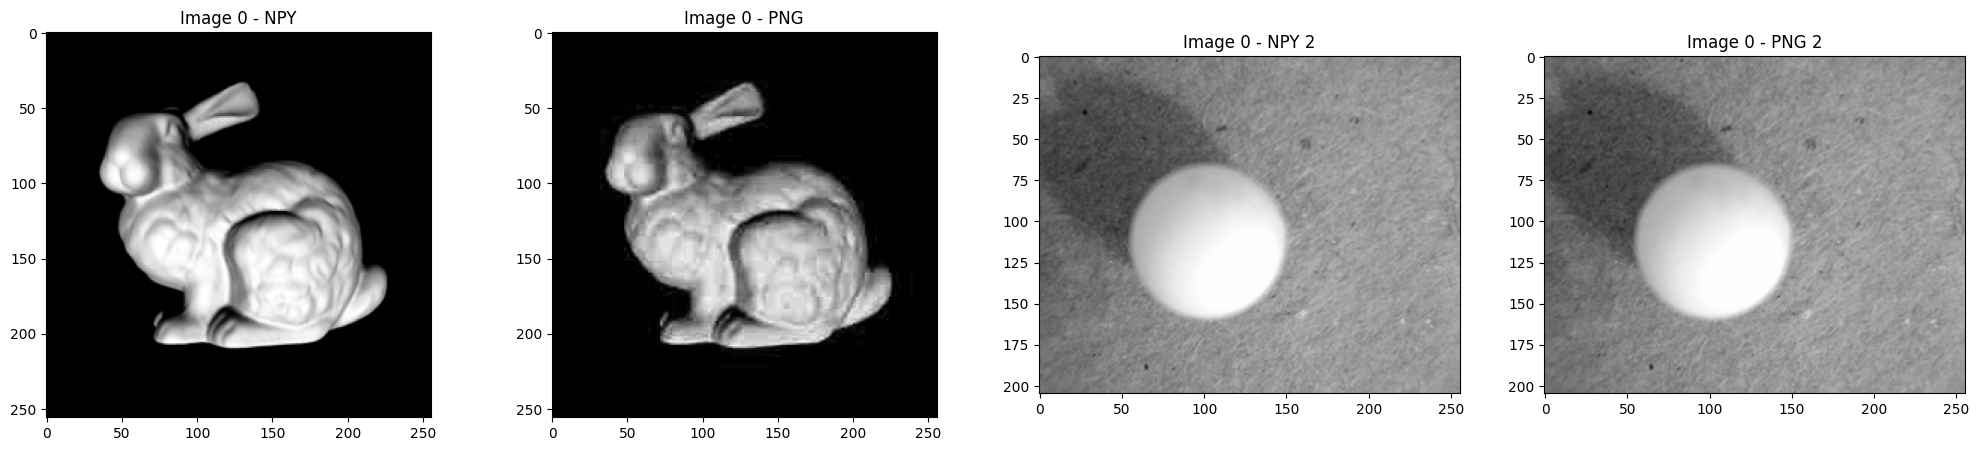

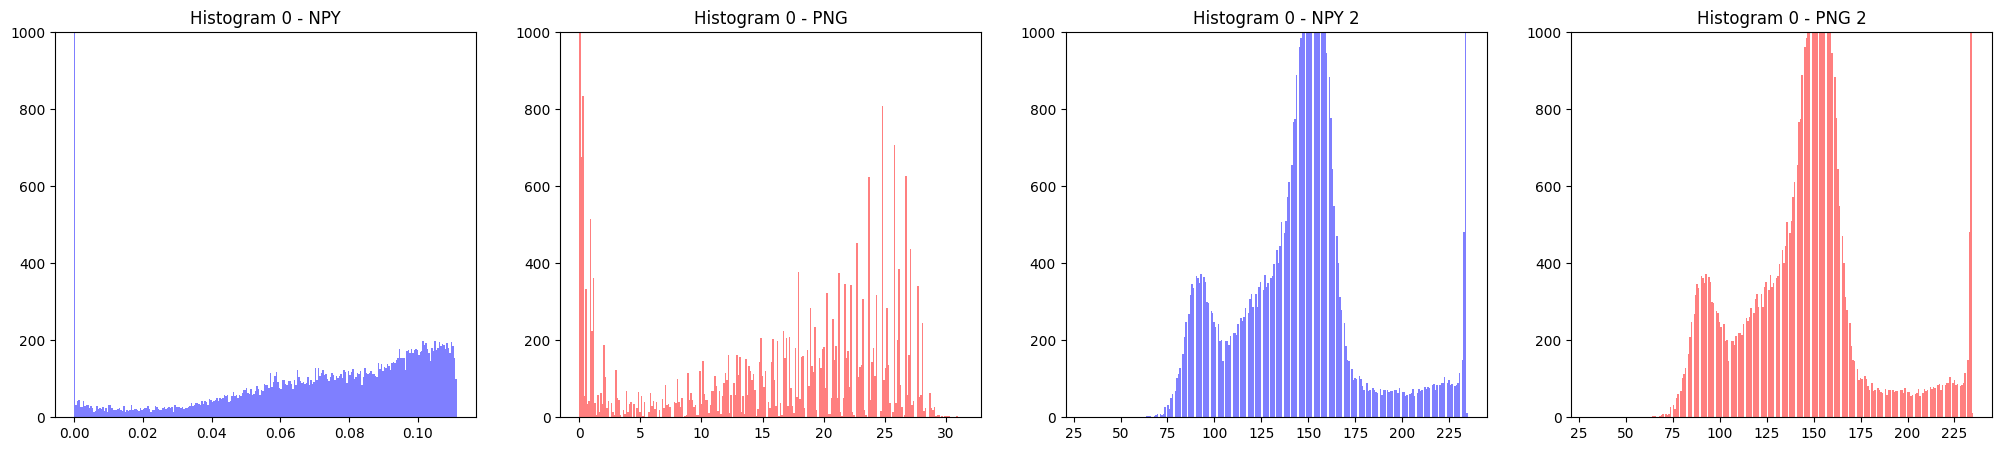

Image 0 - NPY Statistics:
Mean: 0.02408867447291402, Std: 0.038514191305013656, Max: 0.11136594209820033, Min: 0.0
Image 0 - NPY 2 Statistics:
Mean: 146.15596417682926, Std: 33.737010947104636, Max: 235.0, Min: 30.999999999999996
Image 0 - PNG Statistics:
Mean: 6.013729095458984, Std: 9.570487991811243, Max: 31.369999999999997, Min: 0.0
Image 0 - PNG 2 Statistics:
Mean: 146.15596417682926, Std: 33.737010947104636, Max: 235.0, Min: 30.999999999999996
--------------------------------------------------


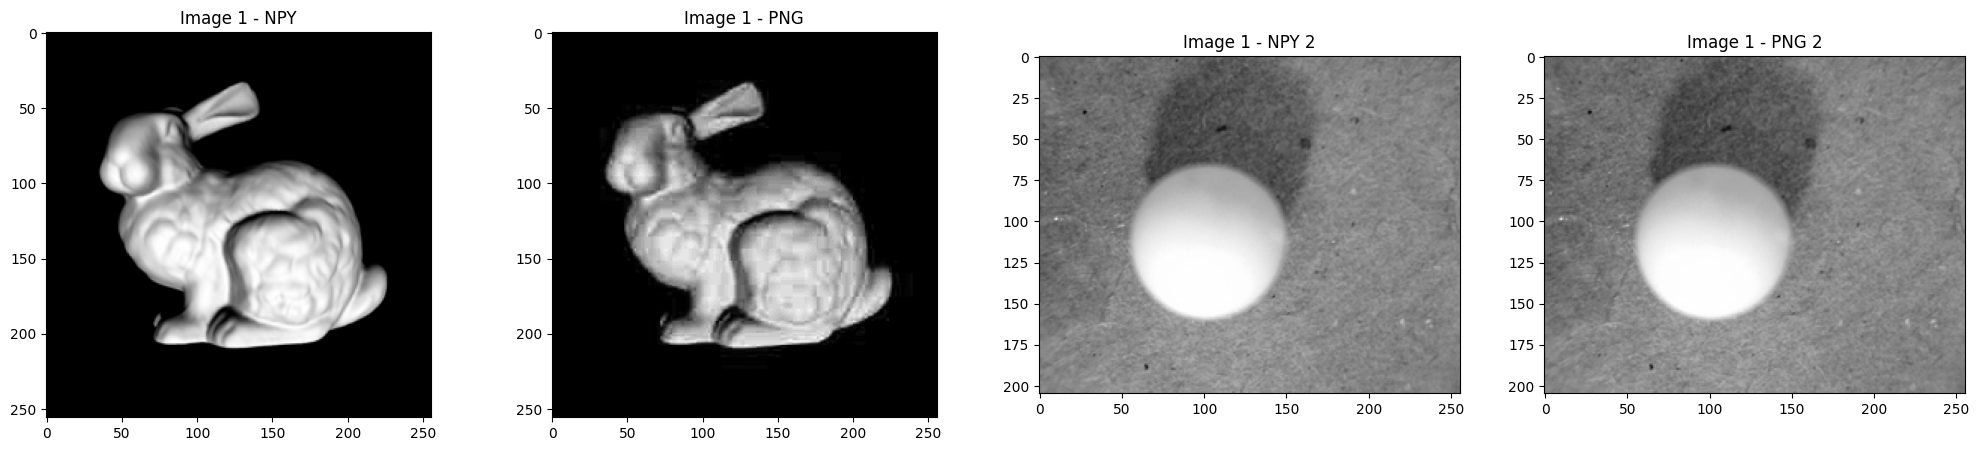

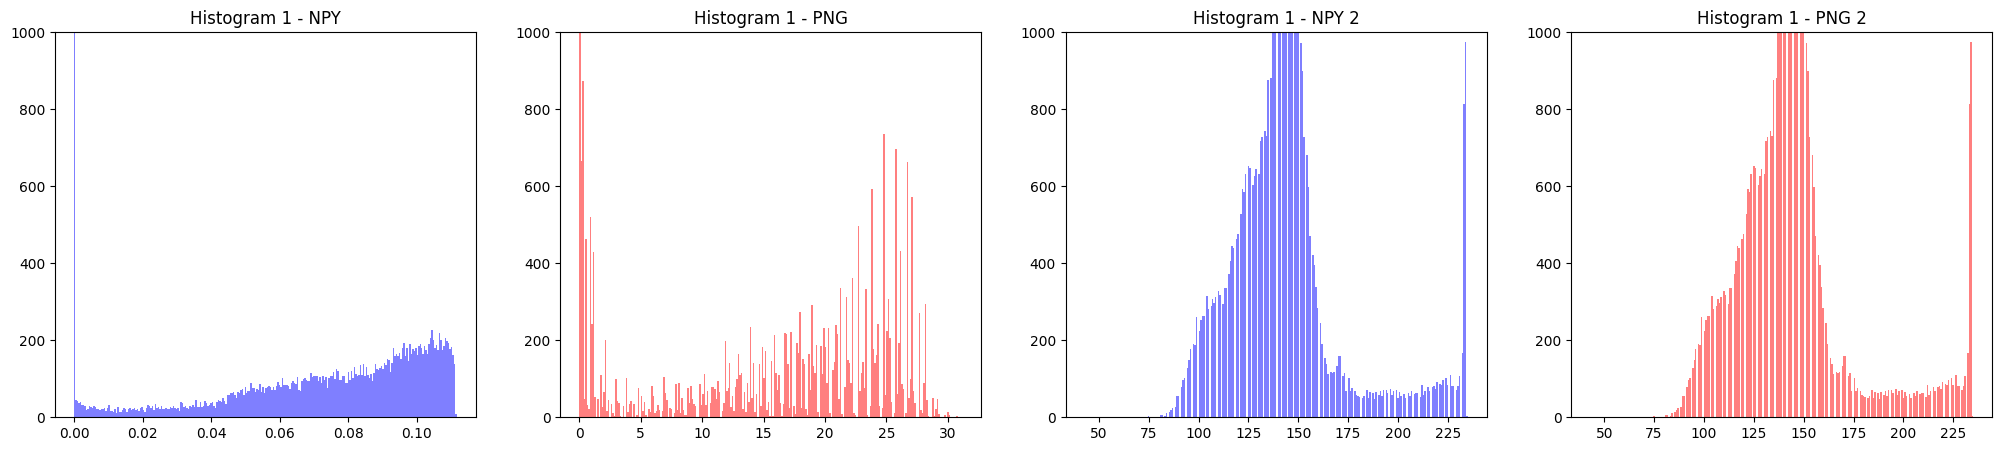

Image 1 - NPY Statistics:
Mean: 0.02434822021185186, Std: 0.03884367038932095, Max: 0.11176740661263466, Min: 0.0
Image 1 - NPY 2 Statistics:
Mean: 144.79167301829267, Std: 30.255240853552923, Max: 235.0, Min: 43.0
Image 1 - PNG Statistics:
Mean: 6.080178375244141, Std: 9.651845124001476, Max: 31.19, Min: 0.0
Image 1 - PNG 2 Statistics:
Mean: 144.79167301829267, Std: 30.255240853552923, Max: 235.0, Min: 43.0
--------------------------------------------------


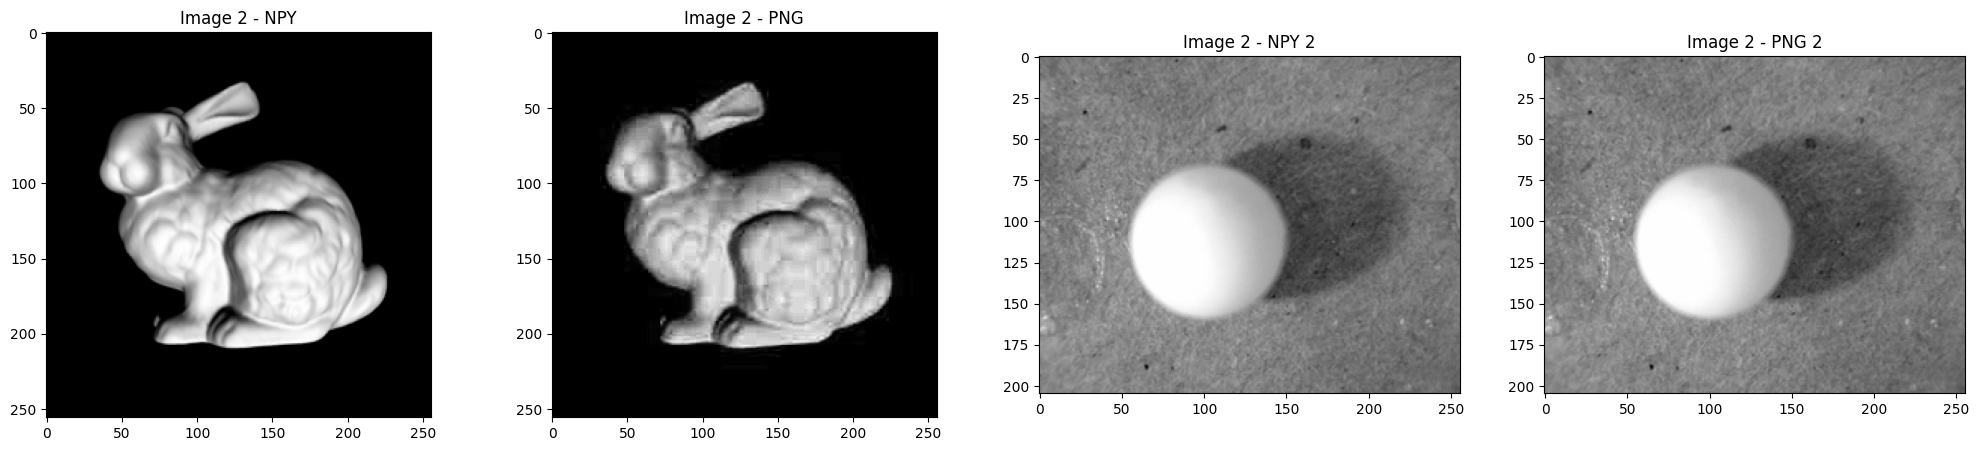

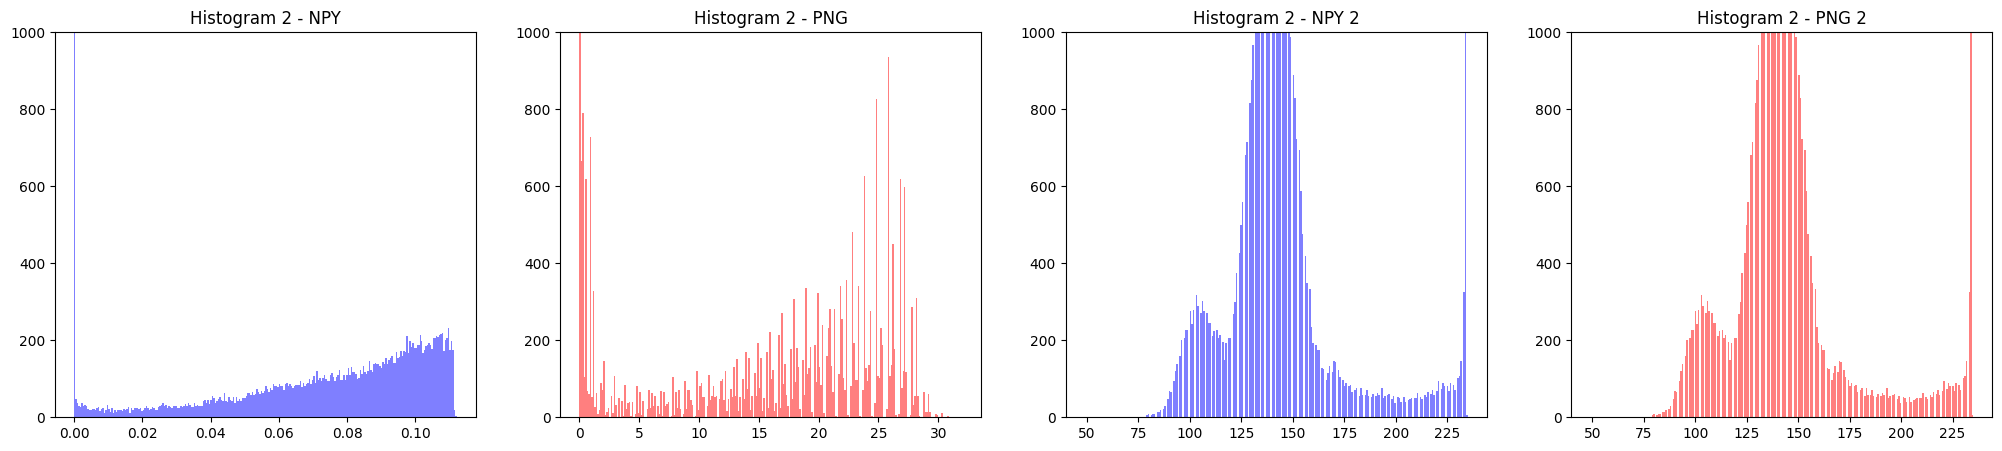

Image 2 - NPY Statistics:
Mean: 0.024672477918008088, Std: 0.03925234984314252, Max: 0.11219521760940553, Min: 0.0
Image 2 - NPY 2 Statistics:
Mean: 145.15537347560976, Std: 30.130273892130226, Max: 235.0, Min: 49.0
Image 2 - PNG Statistics:
Mean: 6.16264663696289, Std: 9.752732612079676, Max: 32.01, Min: 0.0
Image 2 - PNG 2 Statistics:
Mean: 145.15537347560976, Std: 30.130273892130226, Max: 235.0, Min: 49.0
--------------------------------------------------


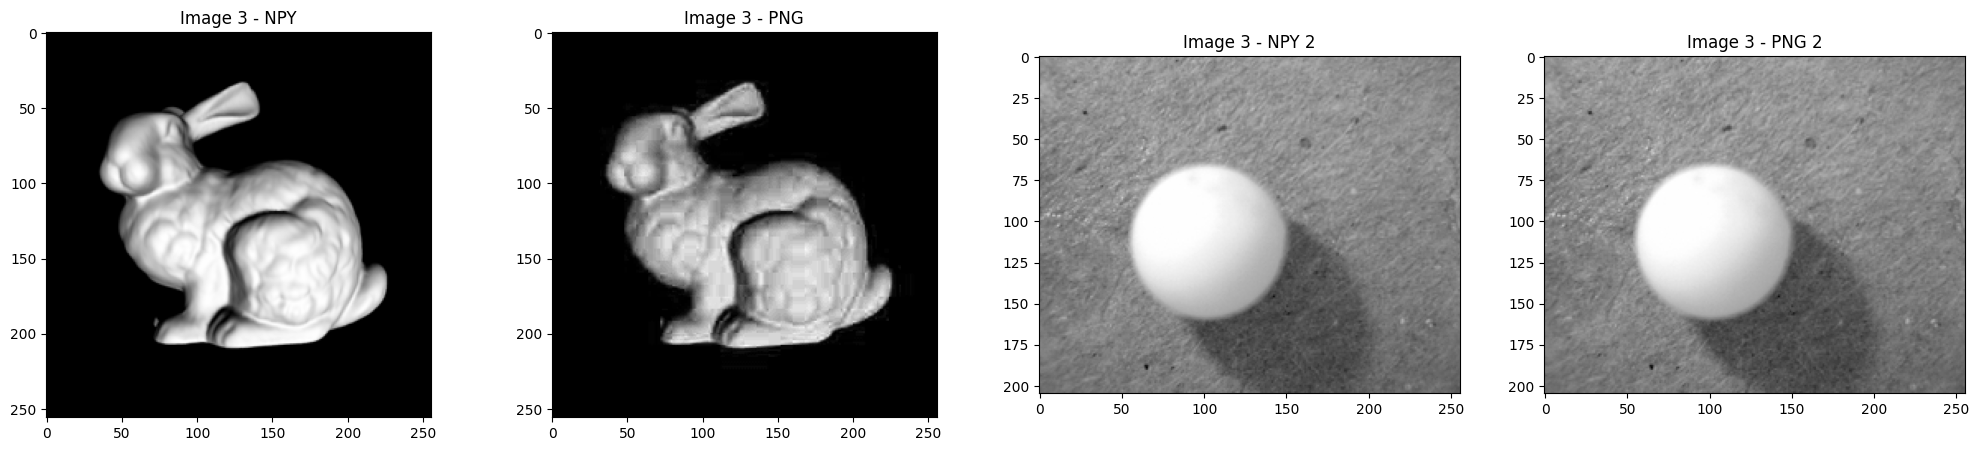

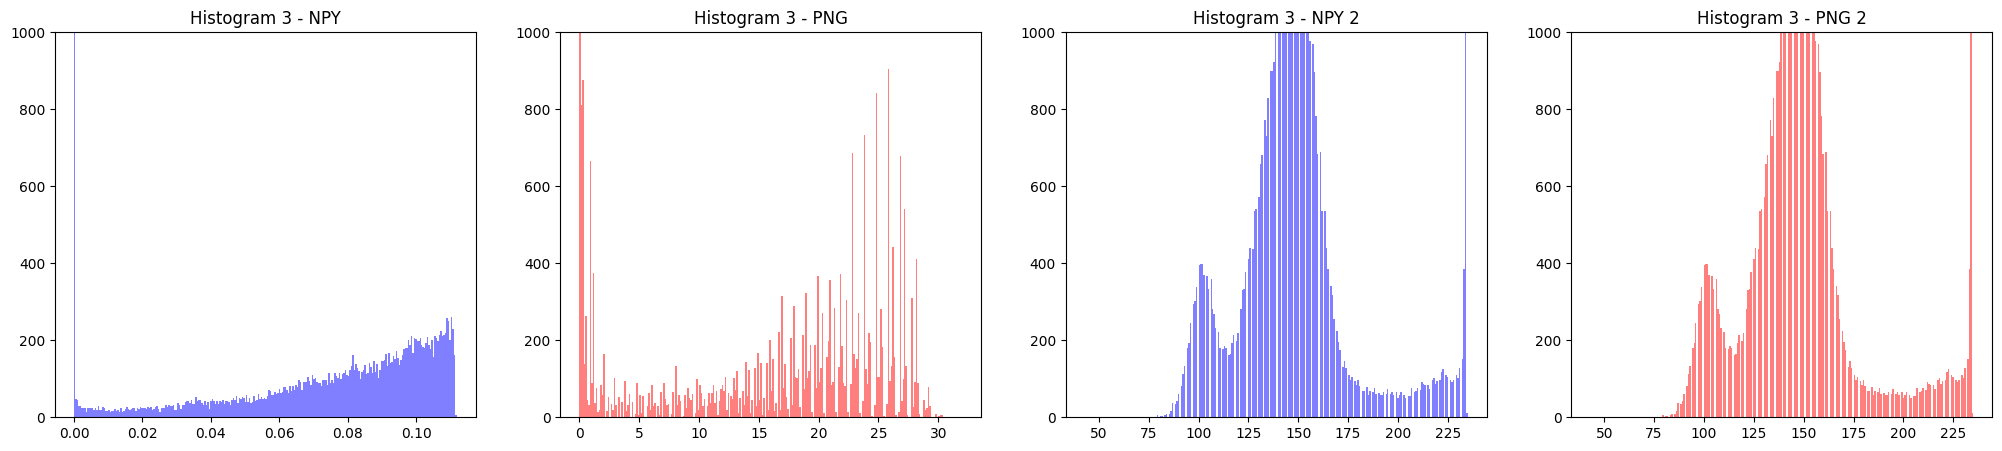

Image 3 - NPY Statistics:
Mean: 0.025027444049977348, Std: 0.03971342958123868, Max: 0.11191573545336722, Min: 0.0
Image 3 - NPY 2 Statistics:
Mean: 148.15413490853658, Std: 30.760309657159834, Max: 235.0, Min: 43.0
Image 3 - PNG Statistics:
Mean: 6.2523196411132815, Std: 9.860384280137358, Max: 32.01, Min: 0.0
Image 3 - PNG 2 Statistics:
Mean: 148.15413490853658, Std: 30.760309657159834, Max: 235.0, Min: 43.0
--------------------------------------------------


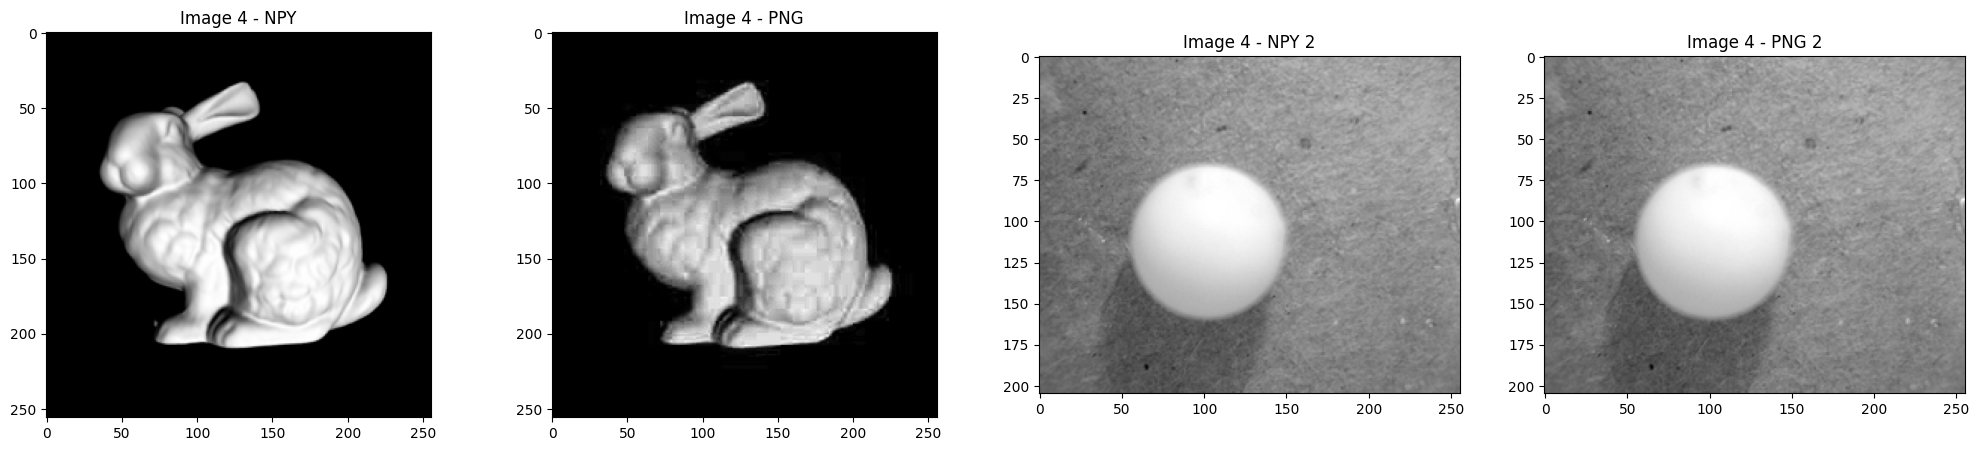

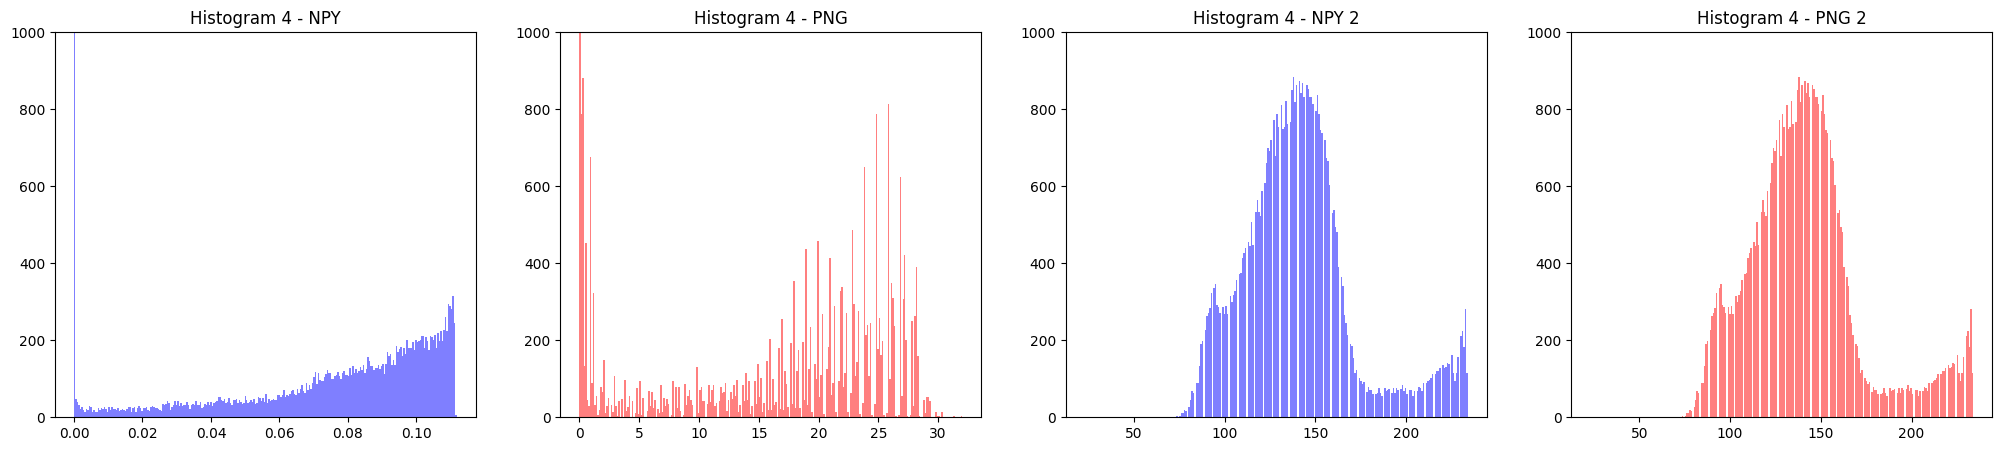

Image 4 - NPY Statistics:
Mean: 0.025399397913059518, Std: 0.04019145601491419, Max: 0.11180470999330282, Min: 0.0
Image 4 - NPY 2 Statistics:
Mean: 141.45716463414635, Std: 32.032732552275, Max: 234.0, Min: 23.0
Image 4 - PNG Statistics:
Mean: 6.349669647216797, Std: 9.997407627349848, Max: 32.02, Min: 0.0
Image 4 - PNG 2 Statistics:
Mean: 141.45716463414635, Std: 32.032732552275, Max: 234.0, Min: 23.0
--------------------------------------------------


In [27]:
# Comparar imagens visualmente e estatisticamente
for idx, (img_npy, img_png, img_npy_2, img_png_2) in enumerate(zip(list_img_npy, list_img_png, list_img_npy_2, list_img_png_2)):

    #img_npy = img_npy * mascara_bin[1]
    #img_png = img_png * mascara_bin[1]
    #img_npy_2 = img_npy_2 * mascara_bin_2[1]
    #img_png_2 = img_png_2 * mascara_bin_2[1]

    # Plotar imagens lado a lado
    fig, axes = plt.subplots(1, 4, figsize=(25, 5))
    axes[0].imshow(img_npy, cmap='gray')
    axes[0].set_title(f'Image {idx} - NPY')
    axes[1].imshow(img_png, cmap='gray')
    axes[1].set_title(f'Image {idx} - PNG')
    axes[2].imshow(img_npy_2, cmap='gray')
    axes[2].set_title(f'Image {idx} - NPY 2')
    axes[3].imshow(img_png_2, cmap='gray')
    axes[3].set_title(f'Image {idx} - PNG 2')

    plt.show()

    # Calcular estatísticas
    mean_npy = np.mean(img_npy)
    std_npy = np.std(img_npy)
    max_npy = np.max(img_npy)
    min_npy = np.min(img_npy)

    mean_npy_2 = np.mean(img_npy_2)
    std_npy_2 = np.std(img_npy_2)
    max_npy_2 = np.max(img_npy_2)
    min_npy_2 = np.min(img_npy_2)

    mean_png = np.mean(img_png)
    std_png = np.std(img_png)
    max_png = np.max(img_png)
    min_png = np.min(img_png)

    mean_png_2 = np.mean(img_png_2)
    std_png_2 = np.std(img_png_2)
    max_png_2 = np.max(img_png_2)
    min_png_2 = np.min(img_png_2)

    # Plotar histogramas
    fig, axes = plt.subplots(1, 4, figsize=(25, 5))
    axes[0].hist(img_npy.ravel(), bins=256, color='blue', alpha=0.5)
    axes[0].set_title(f'Histogram {idx} - NPY')
    axes[0].set_ylim(top=1000)

    axes[1].hist(img_png.ravel(), bins=256, color='red', alpha=0.5)
    axes[1].set_title(f'Histogram {idx} - PNG')
    #axes[1].set_xlim(left=0.01)
    axes[1].set_ylim(top=1000)

    axes[2].hist(img_npy_2.ravel(), bins=256, color='blue', alpha=0.5)
    axes[2].set_title(f'Histogram {idx} - NPY 2')
    #axes[2].set_xlim(left=0.01)
    axes[2].set_ylim(top=1000)

    axes[3].hist(img_png_2.ravel(), bins=256, color='red', alpha=0.5)
    axes[3].set_title(f'Histogram {idx} - PNG 2')
    #axes[3].set_xlim(left=0.01)
    axes[3].set_ylim(top=1000)

    plt.show()

    # Exibir estatísticas
    print(f'Image {idx} - NPY Statistics:')
    print(f'Mean: {mean_npy}, Std: {std_npy}, Max: {max_npy}, Min: {min_npy}')

    print(f'Image {idx} - NPY 2 Statistics:')
    print(f'Mean: {mean_npy_2}, Std: {std_npy_2}, Max: {max_npy_2}, Min: {min_npy_2}')

    print(f'Image {idx} - PNG Statistics:')
    print(f'Mean: {mean_png}, Std: {std_png}, Max: {max_png}, Min: {min_png}')

    print(f'Image {idx} - PNG 2 Statistics:')
    print(f'Mean: {mean_png_2}, Std: {std_png_2}, Max: {max_png_2}, Min: {min_png_2}')

    print('-' * 50)


In [31]:
def exibir_faixa_histograma(imagem, valor_min, valor_max):
    """
    Exibe a imagem com valores de pixel dentro do intervalo especificado.
    
    Parâmetros:
    imagem (numpy.ndarray): A imagem de entrada.
    valor_min (int): O valor mínimo do intervalo.
    valor_max (int): O valor máximo do intervalo.
    
    Retorna:
    None
    """
    # Cria uma máscara para os valores dentro do intervalo
    mascara = (imagem >= valor_min) & (imagem <= valor_max)
    
    # Aplica a máscara na imagem
    imagem_filtrada = np.zeros_like(imagem)
    imagem_filtrada[mascara] = imagem[mascara]
    
    # Exibe a imagem filtrada
    plt.imshow(imagem_filtrada, cmap='gray')
    plt.title(f'Imagem com valores entre {valor_min} e {valor_max}')
    plt.show()



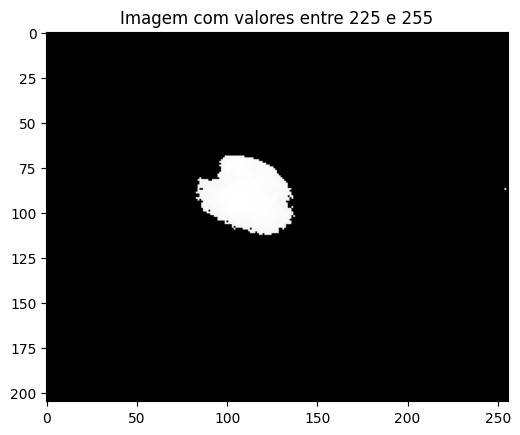

In [45]:
# Exemplo de uso
exibir_faixa_histograma(img_npy_2, 225, 255)

In [8]:
lista_13 = []

for i in range (0, 6):
    lista_13.append(cv2.imread(f'/home/lelis/Documents/Projetos/Photometric_Stereo/RobustPhotometricStereo/data/ex13_muff/imgs/image_0{i}.png'))
    save_image_as_npy(lista_13[i], f'/home/lelis/Documents/Projetos/Photometric_Stereo/RobustPhotometricStereo/data/ex13_muff/imgs/image_0{i}.npy')

Image saved to /home/lelis/Documents/Projetos/Photometric_Stereo/RobustPhotometricStereo/data/ex13_muff/imgs/image_00.npy
Image saved to /home/lelis/Documents/Projetos/Photometric_Stereo/RobustPhotometricStereo/data/ex13_muff/imgs/image_01.npy
Image saved to /home/lelis/Documents/Projetos/Photometric_Stereo/RobustPhotometricStereo/data/ex13_muff/imgs/image_02.npy
Image saved to /home/lelis/Documents/Projetos/Photometric_Stereo/RobustPhotometricStereo/data/ex13_muff/imgs/image_03.npy
Image saved to /home/lelis/Documents/Projetos/Photometric_Stereo/RobustPhotometricStereo/data/ex13_muff/imgs/image_04.npy
Image saved to /home/lelis/Documents/Projetos/Photometric_Stereo/RobustPhotometricStereo/data/ex13_muff/imgs/image_05.npy


In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


In [2]:
normal_map = np.load('/home/lelis/Documents/Projetos/Photometric_Stereo/RobustPhotometricStereo/data/ex14_muff/normal_map.npy')
normal_map.shape

(256, 256, 3)

In [31]:
# calcula a consistencia R do mapa de gradiente

def define_rotacional(mapa_gradiente):
    'recebe uma imagem com dois canais que sao as componentes x e y do gradiente estimado'
    'retorna uma imagem R  onde R[x,y]  é o rotacional do gradiente estimado em torno (x,y)'
    nx = mapa_gradiente.shape[0]
    ny = mapa_gradiente.shape[1]
    consistencia_gradiente = np.zeros((nx,ny))

    for x in range(1,mapa_gradiente.shape[0]-1):
        for y in range(1, mapa_gradiente.shape[1]-1):
            DGxDy = (mapa_gradiente[x,y+1,0] - mapa_gradiente[x,y-1,0])/2
            DGyDx = (mapa_gradiente[x+1,y,1] - mapa_gradiente[x-1,y,1])/2

            consistencia_gradiente[x,y] = (DGxDy - DGyDx)**2

    return consistencia_gradiente





def transforma_mapa_de_normal_em_mapa_de_gradiente(mapa_de_normal):
    'recebe uma imagem com dois canais que sao as componentes x e y da normal estimada'
    'retorna uma imagem com dois canais que sao as componentes x e y do gradiente estimado'
    nx = mapa_de_normal.shape[0]
    ny = mapa_de_normal.shape[1]
    mapa_de_gradiente = np.zeros((nx,ny,2))

    for x in range(mapa_de_normal.shape[0]):
        for y in range(mapa_de_normal.shape[1]):
            mapa_de_gradiente[x,y,0] = mapa_de_normal[x,y,0]/(mapa_de_normal[x,y,2]+0.0001)
            mapa_de_gradiente[x,y,1] = mapa_de_normal[x,y,1]/(mapa_de_normal[x,y,2]+0.0001)

    return mapa_de_gradiente


In [32]:
gradient_map = transforma_mapa_de_normal_em_mapa_de_gradiente(normal_map)
gradient_map.shape

(256, 256, 2)

In [33]:
consitencia_do_gradiente = define_rotacional(gradient_map)

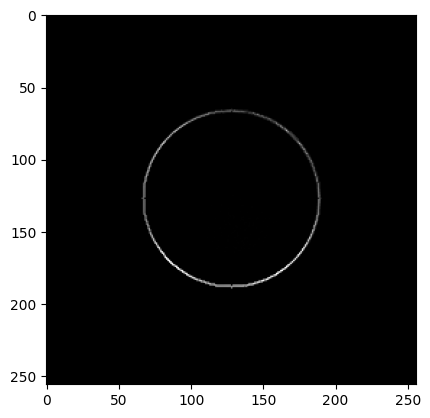

In [35]:
plt.imshow(consitencia_do_gradiente, cmap='gray')

In [36]:
normal_map_bunny = np.load('/home/lelis/Documents/Projetos/Photometric_Stereo/RobustPhotometricStereo/data/bunny/normal_map.npy')

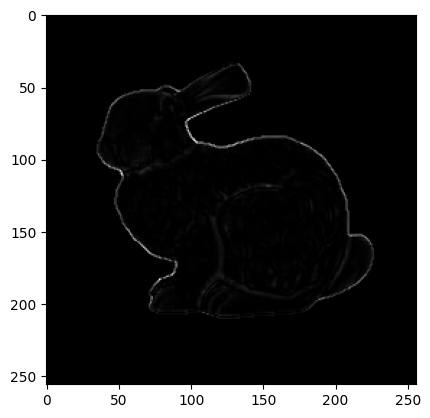

In [37]:
gradient_map_bunny = transforma_mapa_de_normal_em_mapa_de_gradiente(normal_map_bunny)
consistencia_do_gradiente_bunny = define_rotacional(gradient_map_bunny)
plt.imshow(consistencia_do_gradiente_bunny, cmap='gray')